# Dilepton Project notebook

### Setup

In [1]:
import ROOT
import matplotlib.pyplot as plt
from root_numpy import root2array, list_branches
import numpy as np

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['font.size'] = 16

In [3]:
# define a null-rect to add info in legends
from matplotlib.patches import Rectangle
nullRect = Rectangle((0, 0), 1, 1, fill=False, edgecolor='none')

### Config

To build this file, run 

    $ ./main nw

with any other wanted modifier.

In [9]:
# this dataset was created with 30 eta samples in [-5, 5] and 20 top-mass smearings in [100, 200]
filename = 'afs/dilepton/data/build/nw-seta80-stop40-20150826-1550.root'

In [11]:
data = {}
data["truth"] = root2array(filename, treename='Truth')
data["nw"] = root2array(filename, treename="Neutrino Weighting")

In [13]:
for index in data:
    print(index)
    print(data[index].dtype)

truth
[('id', '<f4'), ('eta', '<f4'), ('m', '<f4'), ('phi', '<f4'), ('pt', '<f4'), ('px', '<f4'), ('py', '<f4'), ('pz', '<f4'), ('Et_miss', '<f4'), ('b_delta_R', '<f4'), ('b_delta_phi', '<f4'), ('l_delta_R', '<f4'), ('l_delta_R_boosted', '<f4'), ('l_delta_phi', '<f4'), ('l_delta_phi_boosted', '<f4'), ('lm_b1_delta_R', '<f4'), ('lm_b1_delta_phi', '<f4'), ('lm_b2_delta_R', '<f4'), ('lm_b2_delta_phi', '<f4'), ('lm_pt', '<f4'), ('lm_reco_id', '<f4'), ('lp_b1_delta_R', '<f4'), ('lp_b1_delta_phi', '<f4'), ('lp_b2_delta_R', '<f4'), ('lp_b2_delta_phi', '<f4'), ('lp_pt', '<f4'), ('lp_reco_id', '<f4'), ('mW_m', '<f4'), ('mW_p', '<f4'), ('nuBar_eta', '<f4'), ('nuBar_phi', '<f4'), ('nuBar_pt', '<f4'), ('nuBar_px', '<f4'), ('nuBar_py', '<f4'), ('nuBar_pz', '<f4'), ('nuBar_reco_id', '<f4'), ('nu_eta', '<f4'), ('nu_phi', '<f4'), ('nu_pt', '<f4'), ('nu_px', '<f4'), ('nu_py', '<f4'), ('nu_pz', '<f4'), ('nu_reco_id', '<f4'), ('px_miss', '<f4'), ('py_miss', '<f4'), ('pz_miss', '<f4'), ('t_delta_R', '<f4'

## Plots

### Weights

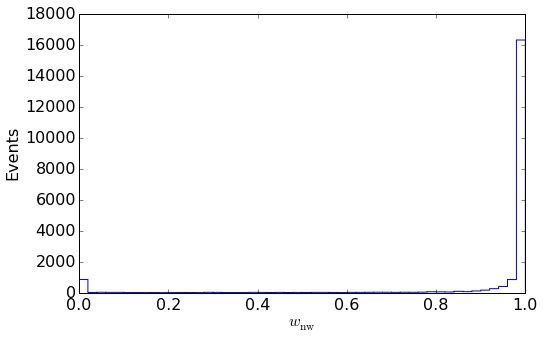

In [15]:
n, bins, pathces = plt.hist(data["nw"]["t_weight"], 50, histtype="step")
plt.xlabel('$w_\mathrm{nw}$')
plt.ylabel('Events')

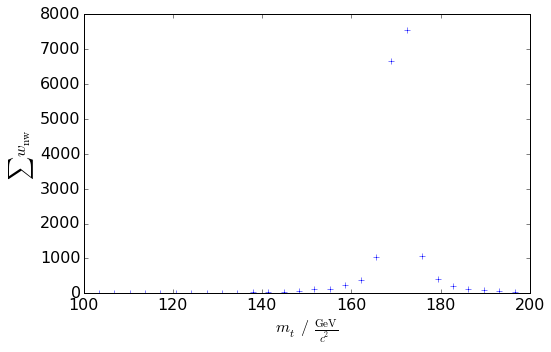

In [20]:
# calc mean weight for each bin of top-mass
weights = data['nw']['t_weight']
mass = data['nw']['m']
bins = 30

xs = np.linspace(100, 200, bins)
ys = np.zeros(bins)
for i in range(0, ys.size-1):
    weight_bin = weights[mass > xs[i]]
    mass_bin = mass[mass > xs[i]]
    weight_bin = weight_bin[mass_bin < xs[i+1]]
    mass_bin = mass_bin[mass_bin < xs[i+1]]
    ys[i] = weight_bin.sum()

f, ax = plt.subplots()
ax.plot(xs, ys, '+')
ax.set_xlabel(r'$m_t\,/\,\frac{\mathrm{GeV}}{c^2}$')
ax.set_ylabel(r'$\sum w_\mathrm{nw}$')

In [21]:
f, ax = plt.subplots()
selection = [data["truth"]["Et_miss"] > 200]
plt.hist2d(data["truth"]["nu_eta"], data["truth"]["nuBar_eta"], 100);

plt.clf()
plt.hist(data["truth"]["nu_eta"][selection], bins=100, weights=data["truth"]["t_weight"][selection]);

ValueError: field named t_weight not found